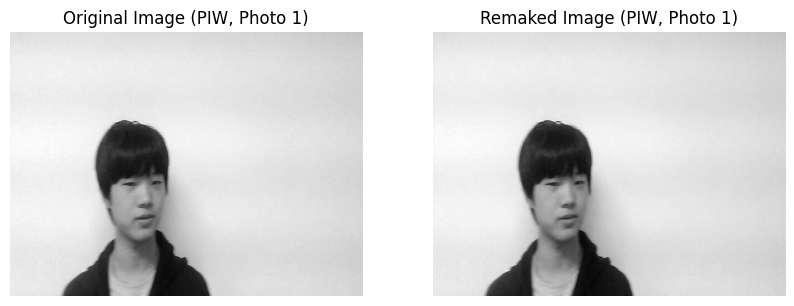

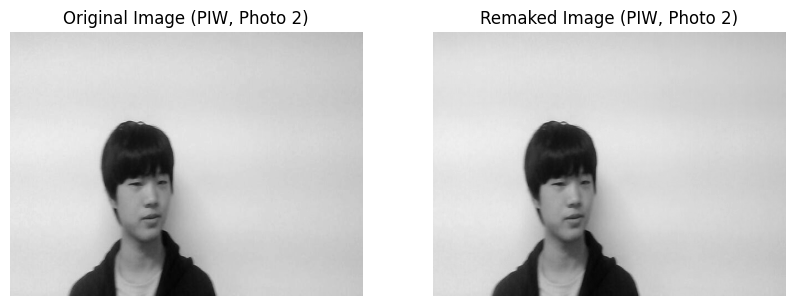

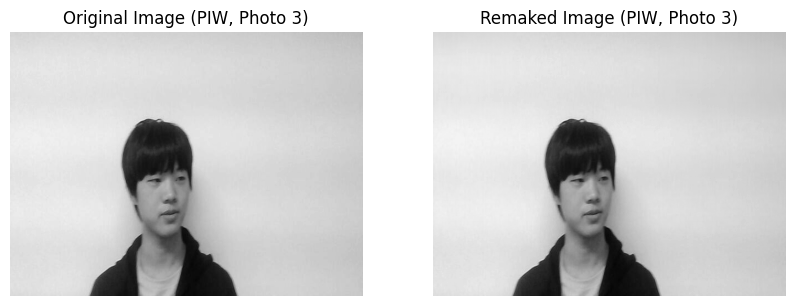

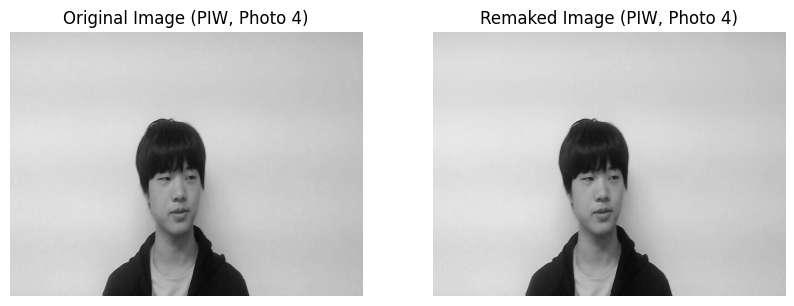

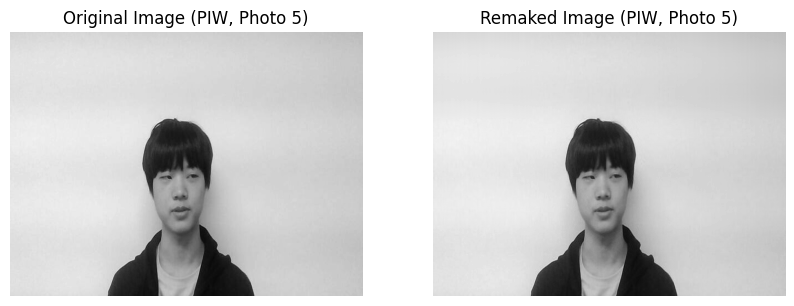

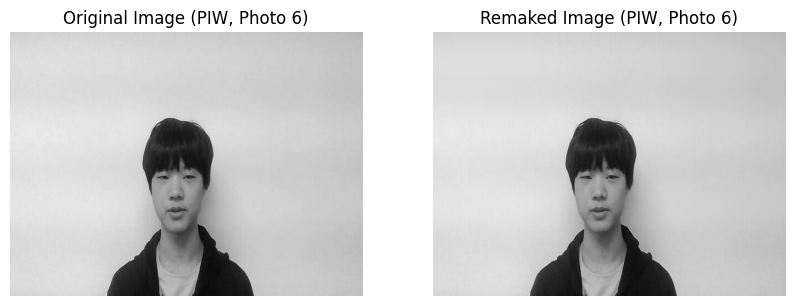

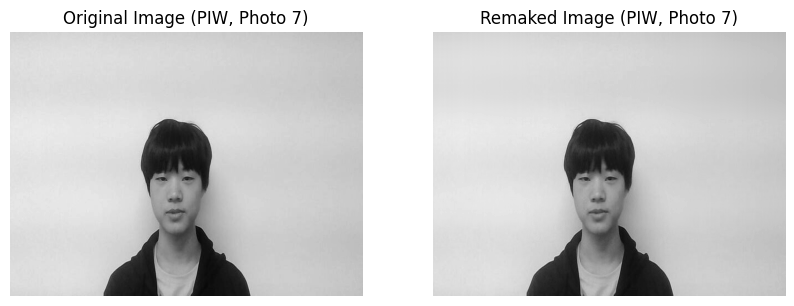

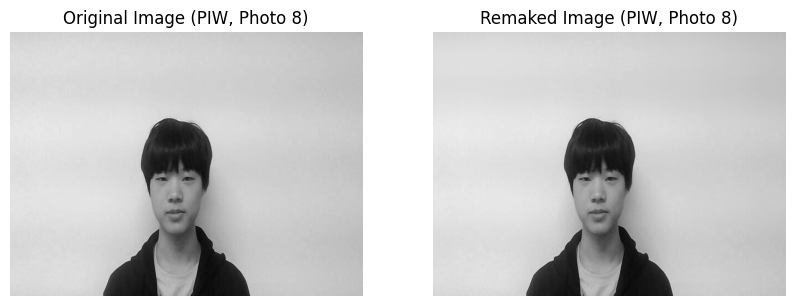

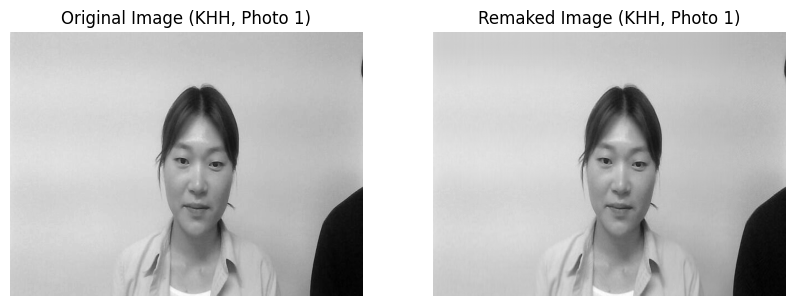

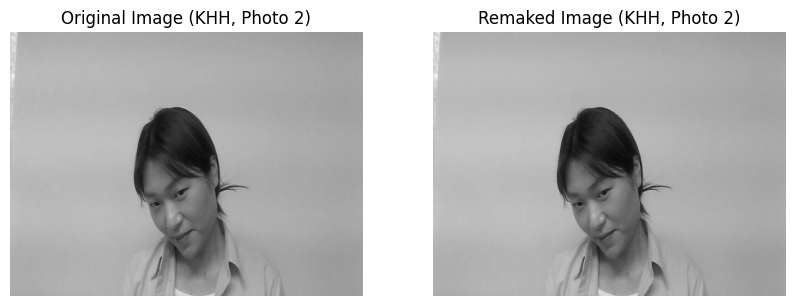

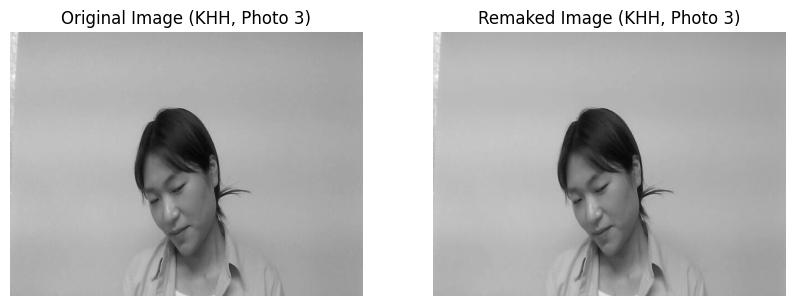

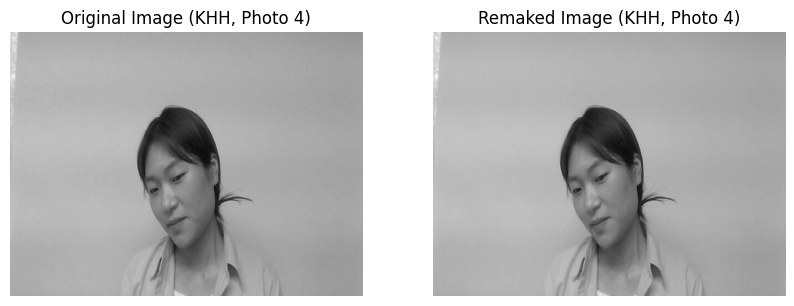

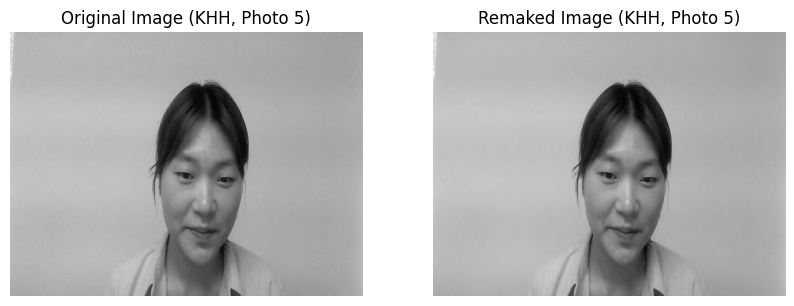

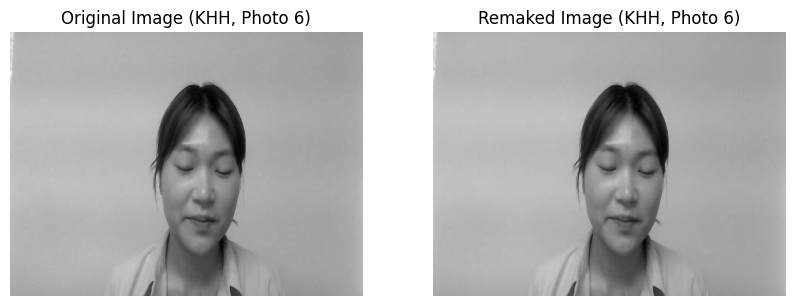

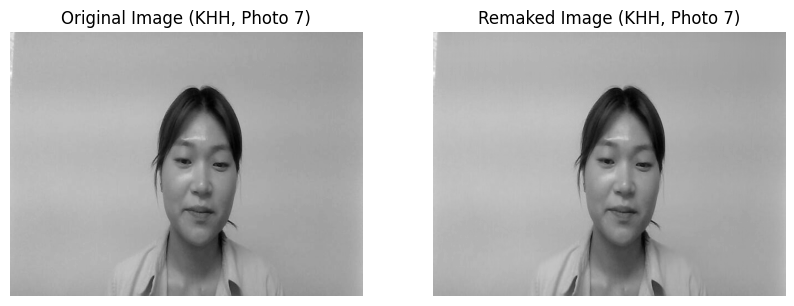

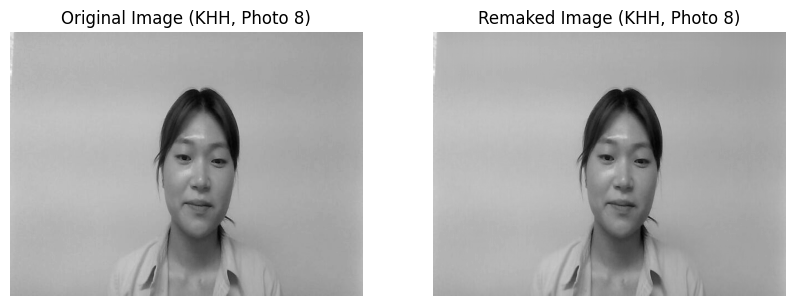

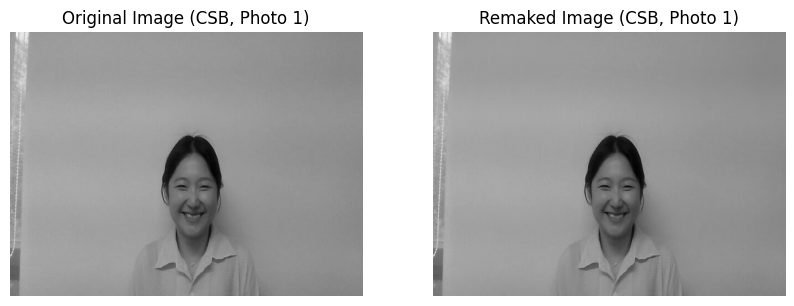

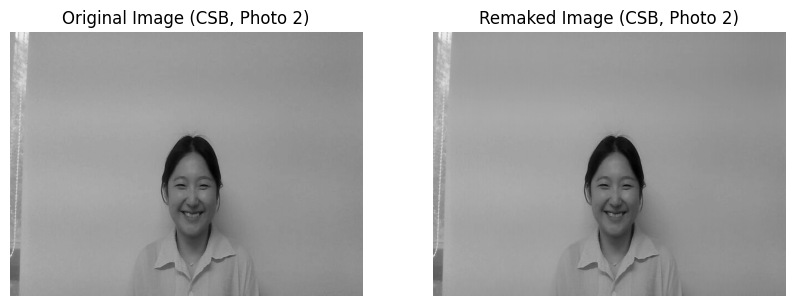

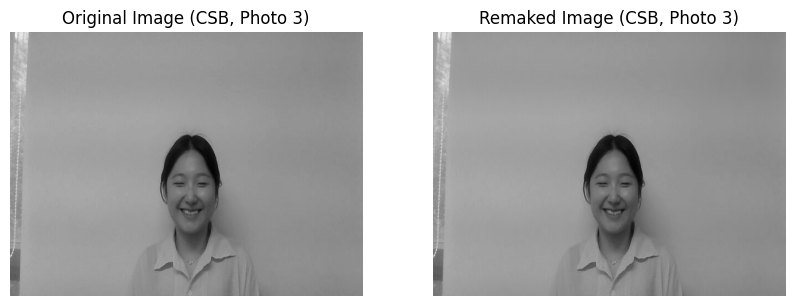

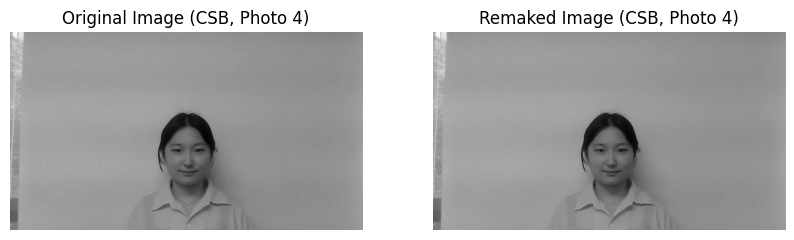

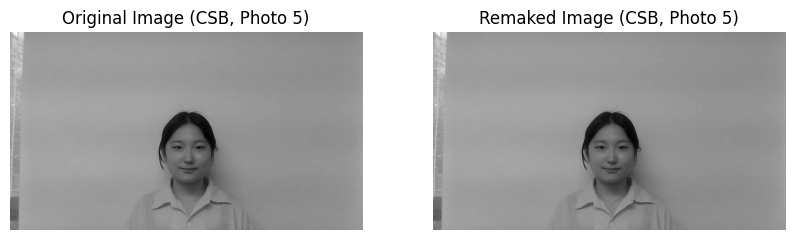

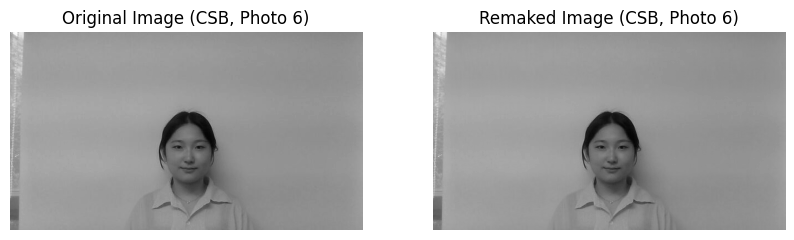

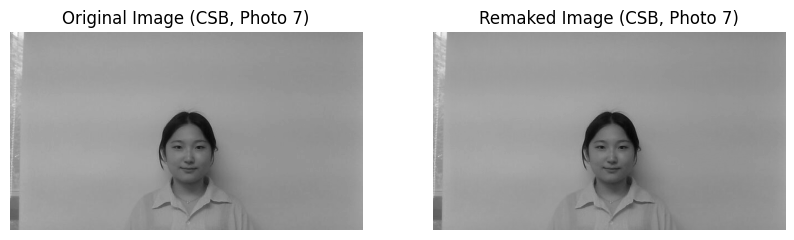

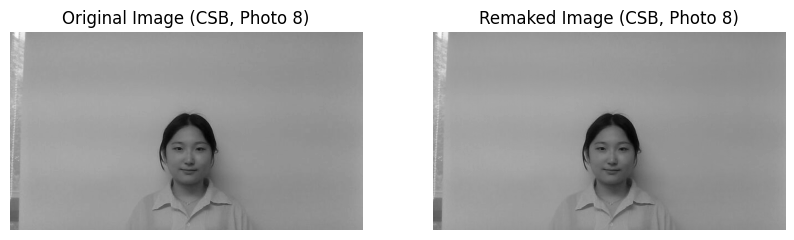

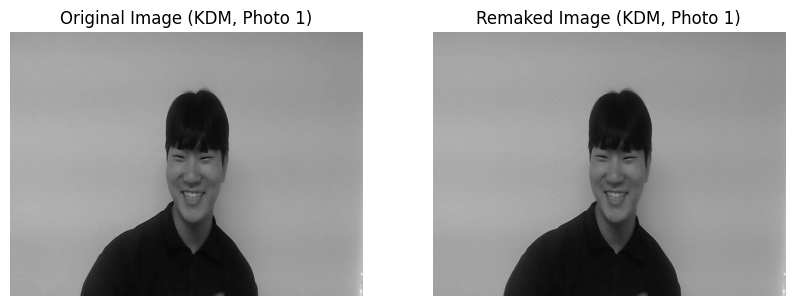

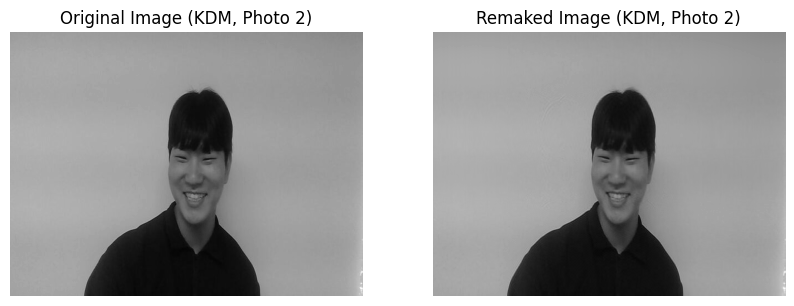

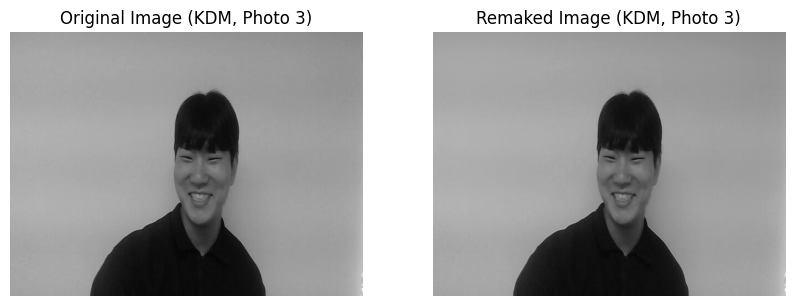

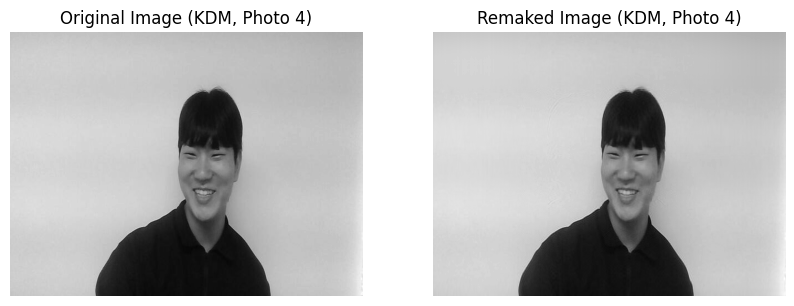

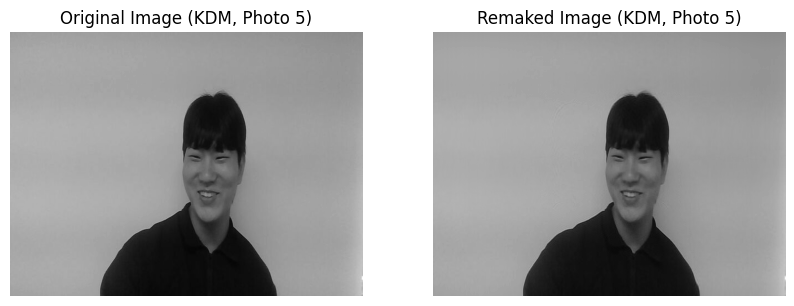

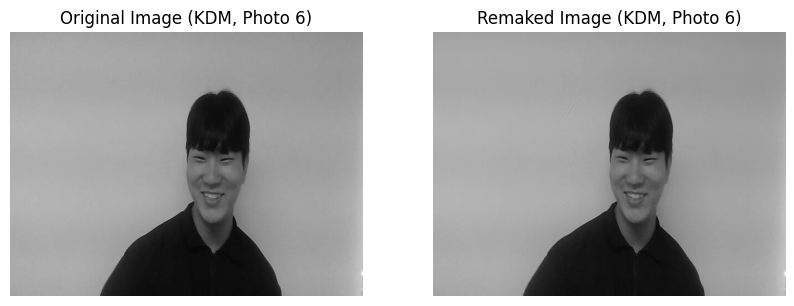

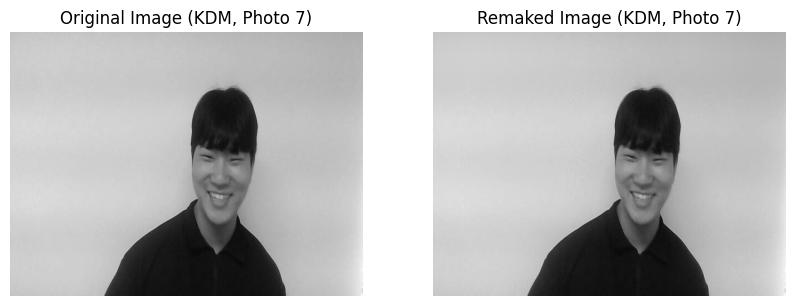

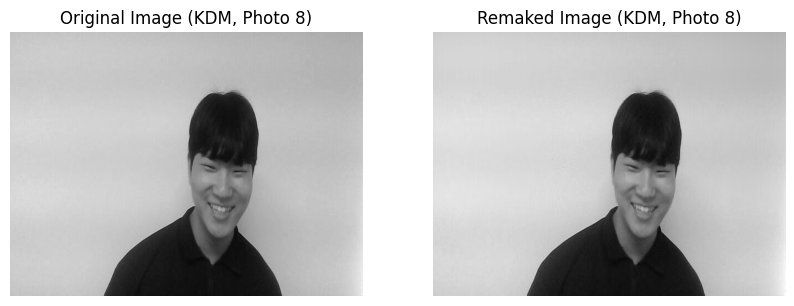

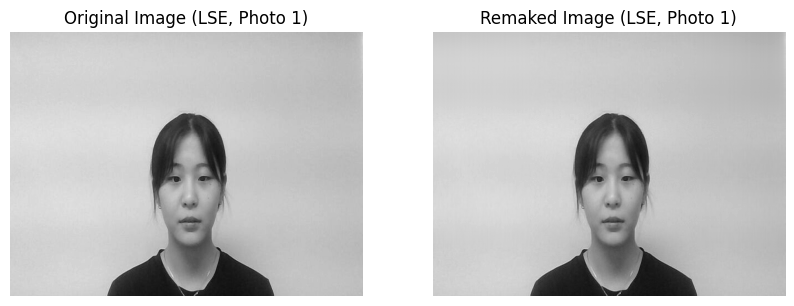

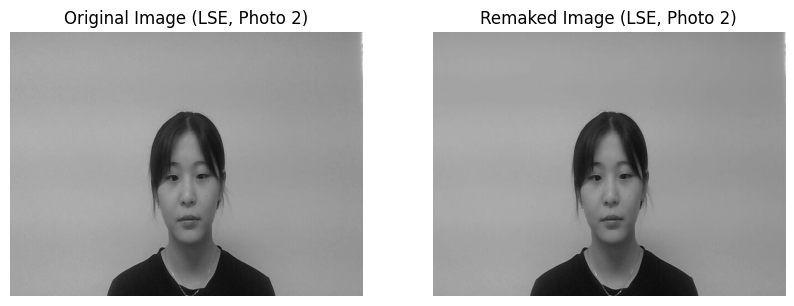

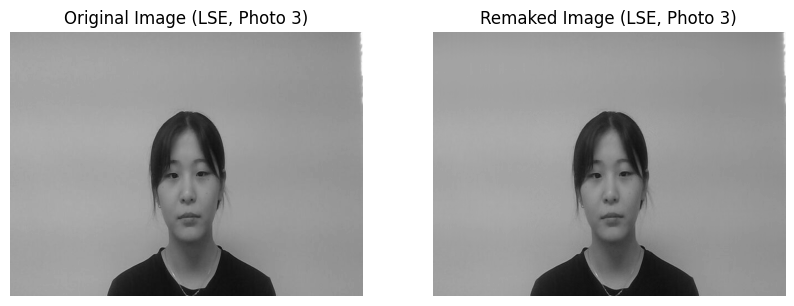

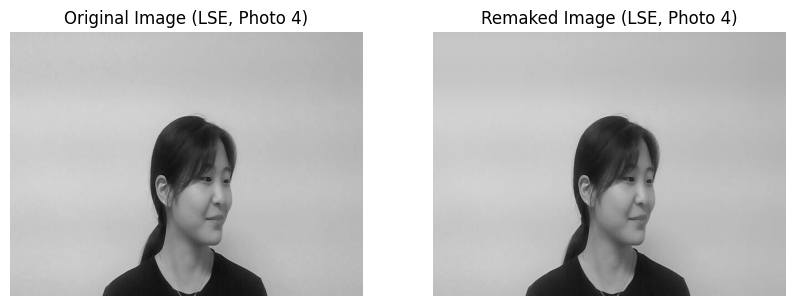

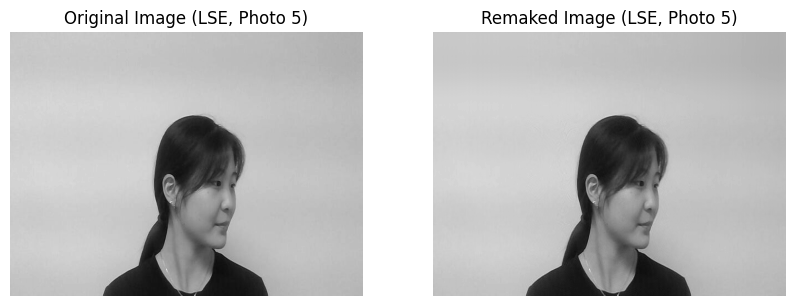

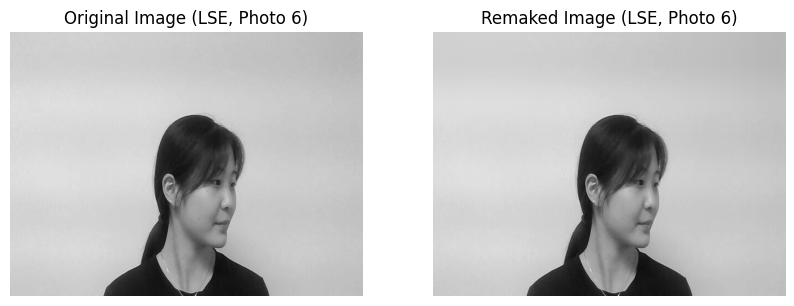

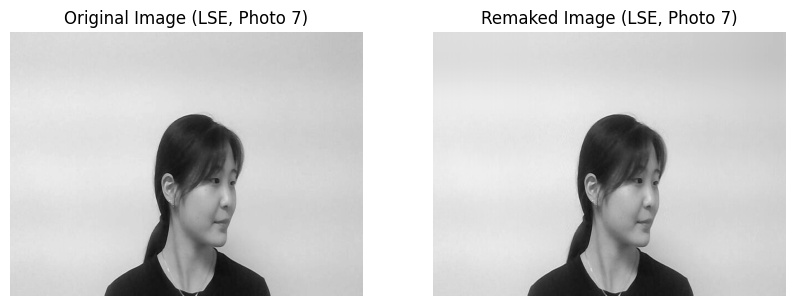

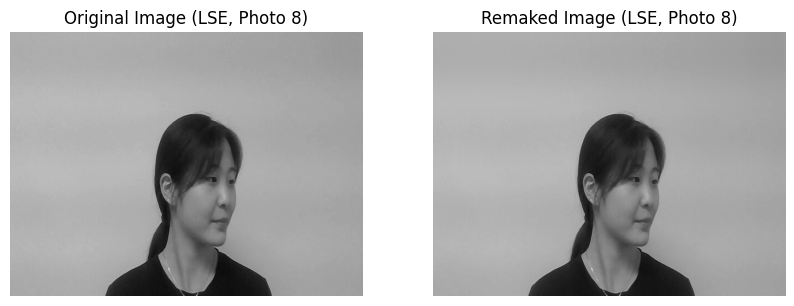

Image Team2_001_AAA_0001.jpg not found.
Image Team2_001_AAA_0002.jpg not found.
Image Team2_001_AAA_0003.jpg not found.
Image Team2_001_AAA_0004.jpg not found.
Image Team2_001_AAA_0005.jpg not found.
Image Team2_001_AAA_0006.jpg not found.
Image Team2_001_AAA_0007.jpg not found.
Image Team2_001_AAA_0008.jpg not found.
Image Team2_002_BBB_0001.jpg not found.
Image Team2_002_BBB_0002.jpg not found.
Image Team2_002_BBB_0003.jpg not found.
Image Team2_002_BBB_0004.jpg not found.
Image Team2_002_BBB_0005.jpg not found.
Image Team2_002_BBB_0006.jpg not found.
Image Team2_002_BBB_0007.jpg not found.
Image Team2_002_BBB_0008.jpg not found.
Image Team2_003_CCC_0001.jpg not found.
Image Team2_003_CCC_0002.jpg not found.
Image Team2_003_CCC_0003.jpg not found.
Image Team2_003_CCC_0004.jpg not found.
Image Team2_003_CCC_0005.jpg not found.
Image Team2_003_CCC_0006.jpg not found.
Image Team2_003_CCC_0007.jpg not found.
Image Team2_003_CCC_0008.jpg not found.
Image Team2_004_DDD_0001.jpg not found.


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 사용할 특잇값의 수
k = 100

# 팀원 이름과 번호 리스트
team_1_members = ['001_PIW', '002_KHH', '003_CSB', '004_KDM', '005_LSE']
team_2_members = ['001_AAA', '002_BBB', '003_CCC', '004_DDD']

# 팀 목록
teams = {
    'Team1': team_1_members,
    'Team2': team_2_members
}


for team_name, members in teams.items():
    for member in members:
        for photo_num in range(1, 9):  # 사진의 개수는 조정
            image_path = f'{team_name}_{member}_{photo_num:04d}.jpg'
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Image {image_path} not found.")
                continue

            image_matrix = np.array(image, dtype=float)

            # SVD 수행
            U, S, VT = np.linalg.svd(image_matrix)

            """
            print(U)
            print(S)
            print(VT)
            를 통해 각각 사진에 대한 U, S, VT를 출력할 수 있음
            """

            # SVD를 사용하여 이미지 복원하기
            reconstructed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

            #출력을 위한 이름에서 숫자와 언더바 제거
            member_display_name = member.split('_')[1]

            # 원본 이미지와 복원된 이미지 시각화
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.title(f"Original Image ({member_display_name}, Photo {photo_num})")
            plt.imshow(image, cmap='gray')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"Remaked Image ({member_display_name}, Photo {photo_num})")
            plt.imshow(reconstructed_image, cmap='gray')
            plt.axis('off')

            plt.show()